In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [33]:
df=pd.read_csv('customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [34]:
cols=['OnlineBackup','StreamingTV','StreamingMovies','DeviceProtection','TechSupport','OnlineSecurity']
for i in cols:
    df[i]=df[i].replace({'No internet service':'No'})

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [36]:
df.TotalCharges=pd.to_numeric(df.TotalCharges,errors='coerce')

In [37]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [38]:
df.dropna(inplace=True)

In [39]:
df.Churn=df.Churn.apply(lambda x: 1 if x=='Yes' else 0)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [40]:
df.drop('customerID',axis=1,inplace=True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [41]:
new_df=pd.get_dummies(df,drop_first=True)
new_df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,1,...,1,1,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,1,1,1,1,0,...,1,1,1,1,1,0,1,0,0,1
7039,0,72,103.20,7362.90,0,0,1,1,1,0,...,1,0,1,1,1,0,1,1,0,0
7040,0,11,29.60,346.45,0,0,1,1,0,1,...,0,0,0,0,0,0,1,0,1,0
7041,1,4,74.40,306.60,1,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [42]:
new_df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,0.265785,0.504693,0.482509,0.298493,0.903299,0.096701,...,0.343857,0.290102,0.384386,0.388367,0.209329,0.239619,0.592719,0.216297,0.336320,0.228100
std,0.368844,24.545260,30.085974,2266.771362,0.441782,0.500014,0.499729,0.457629,0.295571,0.295571,...,0.475028,0.453842,0.486484,0.487414,0.406858,0.426881,0.491363,0.411748,0.472483,0.419637
min,0.000000,1.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.587500,401.450000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,55.000000,89.862500,3794.737500,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
new_df.tenure=new_df.tenure/100
new_df.MonthlyCharges=new_df.MonthlyCharges/150
new_df.TotalCharges=new_df.TotalCharges/9500

In [44]:
new_df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,0.324218,0.431988,0.240347,0.265785,0.504693,0.482509,0.298493,0.903299,0.096701,...,0.343857,0.290102,0.384386,0.388367,0.209329,0.239619,0.592719,0.216297,0.336320,0.228100
std,0.368844,0.245453,0.200573,0.238608,0.441782,0.500014,0.499729,0.457629,0.295571,0.295571,...,0.475028,0.453842,0.486484,0.487414,0.406858,0.426881,0.491363,0.411748,0.472483,0.419637
min,0.000000,0.010000,0.121667,0.001979,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.090000,0.237250,0.042258,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.290000,0.469000,0.147103,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,0.550000,0.599083,0.399446,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,0.720000,0.791667,0.914189,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
y = new_df['Churn']
X = new_df.drop('Churn',axis=1)

In [46]:
X

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0.01,0.199000,0.003142,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0.34,0.379667,0.198895,1,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0.02,0.359000,0.011384,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,0.45,0.282000,0.193763,1,0,0,0,1,0,...,1,1,0,0,1,0,0,0,0,0
4,0,0.02,0.471333,0.015963,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0.24,0.565333,0.209526,1,1,1,1,0,1,...,1,1,1,1,1,0,1,0,0,1
7039,0,0.72,0.688000,0.775042,0,1,1,1,0,1,...,1,0,1,1,1,0,1,1,0,0
7040,0,0.11,0.197333,0.036468,0,1,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
7041,1,0.04,0.496000,0.032274,1,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1


In [31]:
new_df.to_csv("churn.csv")

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# LOGISTIC REGRESSION

In [48]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [49]:
model.fit(X_train,y_train)

LogisticRegression()

In [50]:
model.score(X_test,y_test)*100 , model.score(X_train,y_train)*100

(81.37882018479033, 79.96444444444445)

In [51]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,model.predict(X_test))
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1052
           1       0.66      0.55      0.60       355

    accuracy                           0.81      1407
   macro avg       0.76      0.73      0.74      1407
weighted avg       0.81      0.81      0.81      1407



In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,model.predict(X_test))

array([[951, 101],
       [161, 194]], dtype=int64)

# logistic regression : 81% accuracy 

# DECISION TREE

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [54]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()

In [55]:
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [56]:
tree.score(X_test,y_test)*100 , tree.score(X_train,y_train)*100

(72.28144989339019, 99.85777777777778)

In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test,tree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1040
           1       0.47      0.50      0.48       367

    accuracy                           0.72      1407
   macro avg       0.64      0.65      0.65      1407
weighted avg       0.73      0.72      0.73      1407



# decision tree  accuracy : 72%

# RANDOM FOREST

In [64]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=35,oob_score=True,n_jobs=-1,max_features='auto')

In [65]:
forest.fit(X_test,y_test)

RandomForestClassifier(n_estimators=35, n_jobs=-1, oob_score=True)

In [88]:
predict_train = model.predict(X_train)
predict_train

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [90]:
from sklearn.metrics import accuracy_score
trainaccuracy = accuracy_score(y_train,predict_train)
print('accuracy_score on train dataset : ', trainaccuracy)

accuracy_score on train dataset :  0.8001777777777778


In [66]:
forest.score(X_test,y_test)*100 , forest.score(X_train,y_train)*100

(99.7867803837953, 79.18222222222222)

# random forest accuracy : 80%

In [82]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [81]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

C:\Users\sampa\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sampa\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


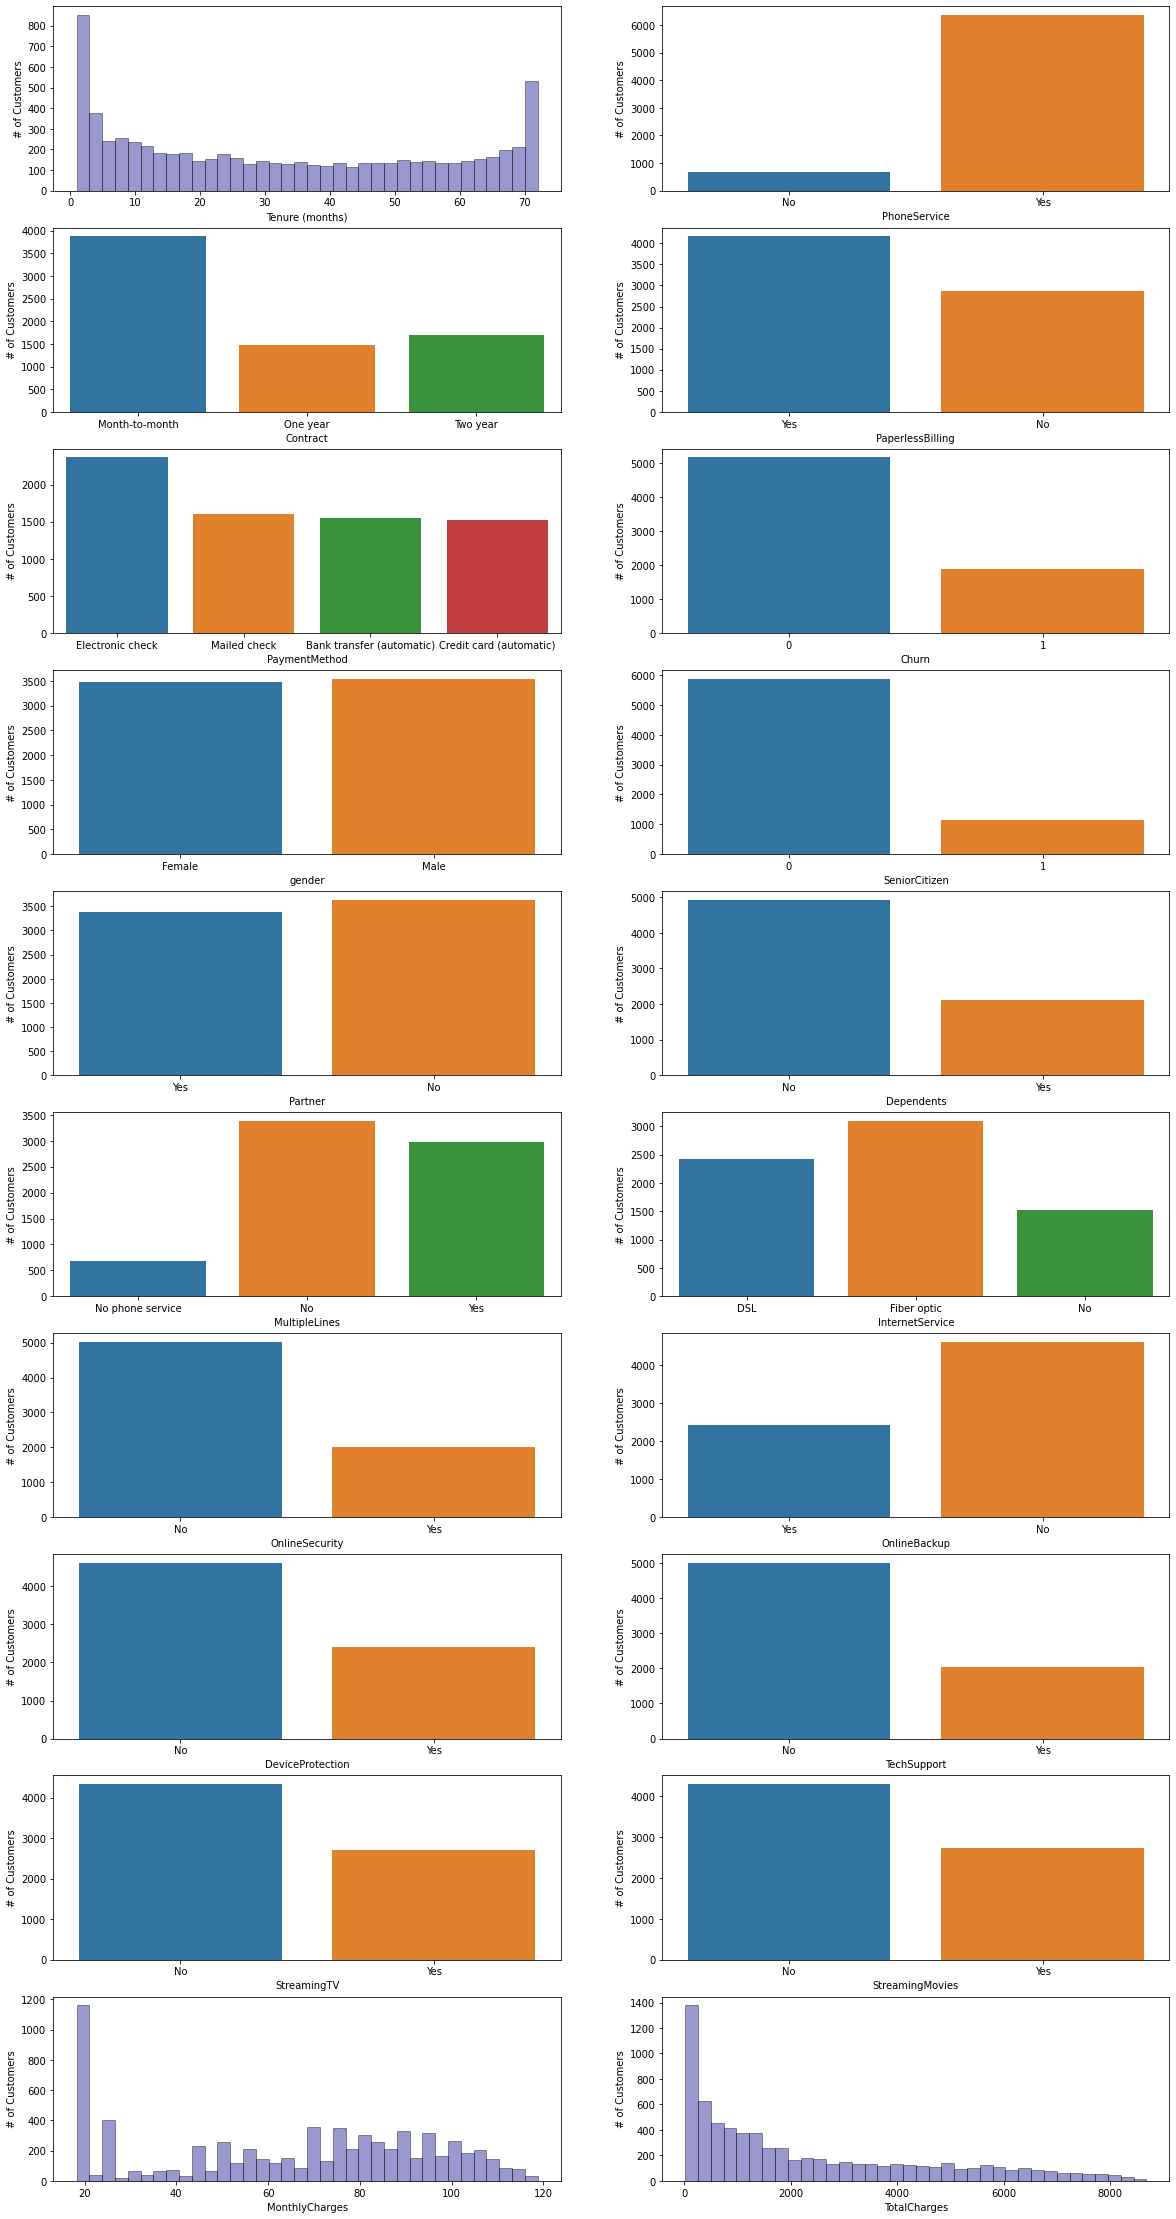

In [85]:
plt.figure(figsize=(20,40))
plt.subplot(10,2,1)
ax = sns.distplot(df['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
plt.subplot(10,2,2)
ax = sns.countplot(x='PhoneService', data=df)
ax.set_ylabel('# of Customers')

plt.subplot(10,2,3)
ax =sns.countplot(x='Contract', data=df)
ax.set_ylabel('# of Customers')

plt.subplot(10,2,3)
ax =sns.countplot(x='Contract', data=df)
ax.set_ylabel('# of Customers')

plt.subplot(10,2,4)
ax =sns.countplot(x='PaperlessBilling', data=df)
ax.set_ylabel('# of Customers')

plt.subplot(10,2,5)
ax =sns.countplot(x='PaymentMethod', data=df)
ax.set_ylabel('# of Customers')

plt.subplot(10,2,6)
ax =sns.countplot(x='Churn', data=df)
ax.set_ylabel('# of Customers')

plt.subplot(10,2,7)
ax =sns.countplot(x='gender', data=df)
ax.set_ylabel('# of Customers')

plt.subplot(10,2,8)
ax =sns.countplot(x='SeniorCitizen', data=df)
ax.set_ylabel('# of Customers')

plt.subplot(10,2,9)
ax =sns.countplot(x='Partner', data=df)
ax.set_ylabel('# of Customers')

plt.subplot(10,2,10)
ax =sns.countplot(x='Dependents', data=df)
ax.set_ylabel('# of Customers')

plt.subplot(10,2,11)
ax =sns.countplot(x='MultipleLines', data=df)
ax.set_ylabel('# of Customers')

plt.subplot(10,2,12)
ax =sns.countplot(x='InternetService', data=df)
ax.set_ylabel('# of Customers')

plt.subplot(10,2,13)
ax =sns.countplot(x='OnlineSecurity', data=df)
ax.set_ylabel('# of Customers')

plt.subplot(10,2,14)
ax =sns.countplot(x='OnlineBackup', data=df)
ax.set_ylabel('# of Customers')

plt.subplot(10,2,15)
ax =sns.countplot(x='DeviceProtection', data=df)
ax.set_ylabel('# of Customers')

plt.subplot(10,2,16)
ax =sns.countplot(x='TechSupport', data=df)
ax.set_ylabel('# of Customers')

plt.subplot(10,2,17)
ax =sns.countplot(x='StreamingTV', data=df)
ax.set_ylabel('# of Customers')

plt.subplot(10,2,18)
ax =sns.countplot(x='StreamingMovies', data=df)
ax.set_ylabel('# of Customers')
plt.subplot(10,2,19)
ax = sns.distplot(df['MonthlyCharges'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('MonthlyCharges')
plt.subplot(10,2,20)
ax = sns.distplot(df['TotalCharges'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('TotalCharges');

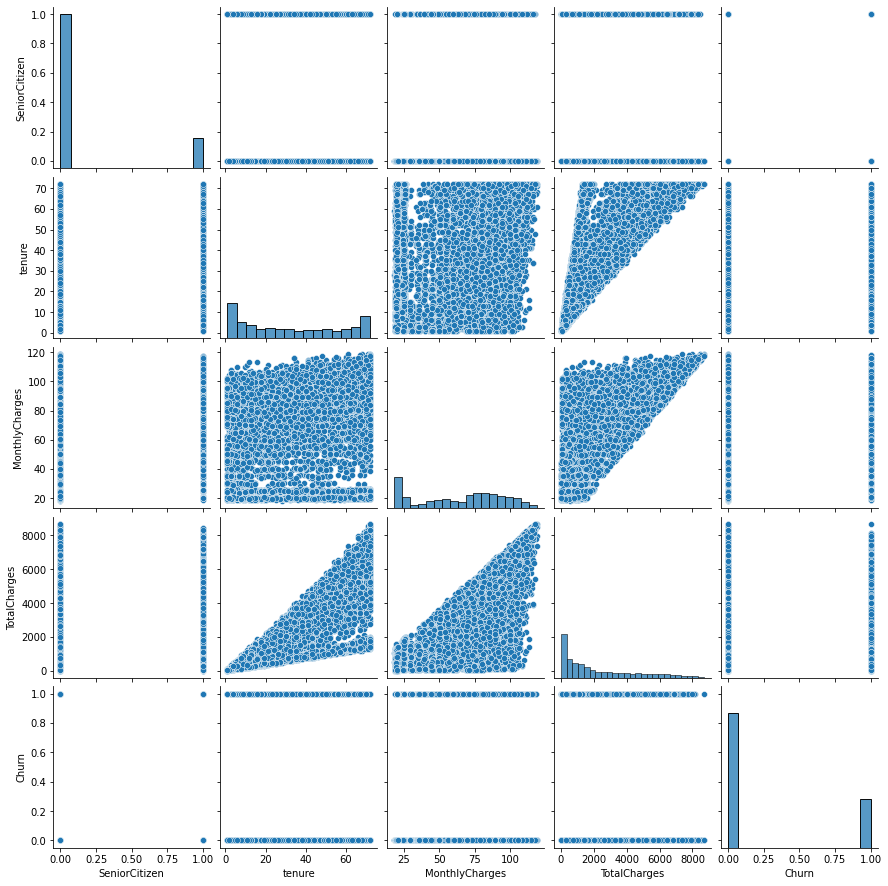

In [86]:
sns.pairplot(df)
plt.show()

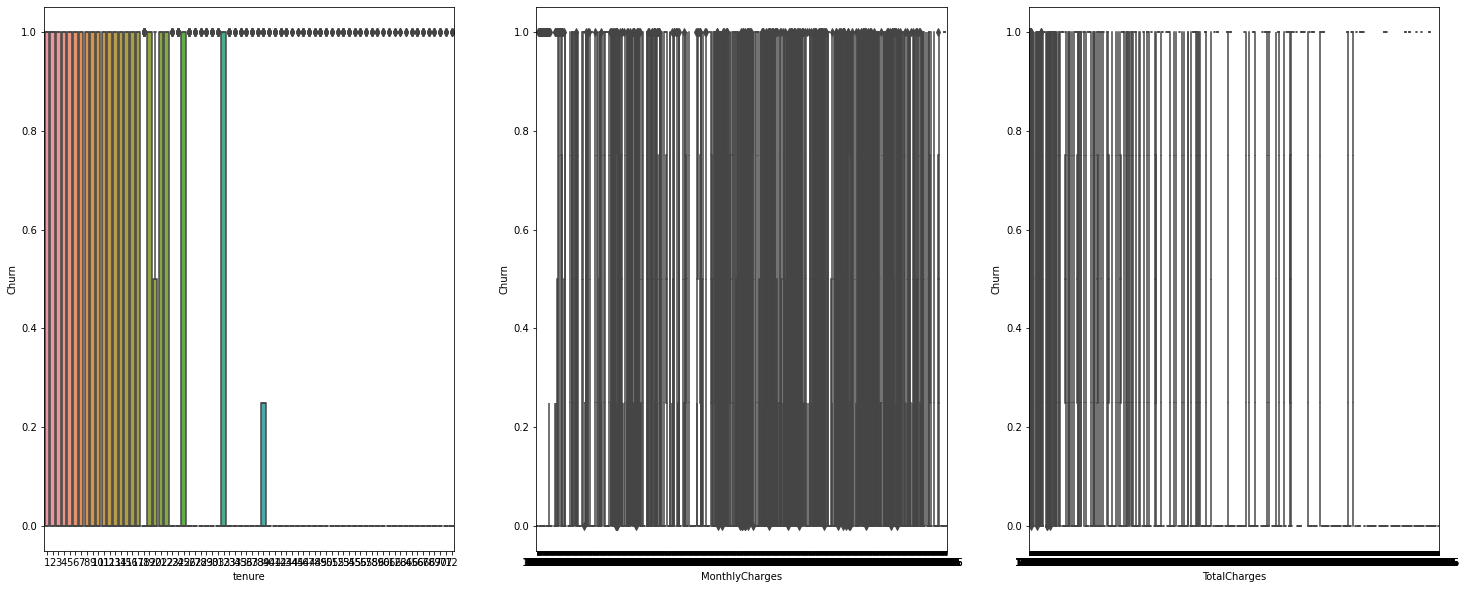

In [87]:
plt.figure(figsize=(25, 10))
plt.subplot(1,3,1)
sns.boxplot(x = 'tenure', y = 'Churn', data=df)
plt.subplot(1,3,2)
sns.boxplot(x = 'MonthlyCharges', y = 'Churn', data=df)
plt.subplot(1,3,3)
sns.boxplot(x = 'TotalCharges', y = 'Churn', data=df)
plt.show()